In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohitv97","key":"0df5750b381233596fa7536ab850a8fc"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets download -d kmader/pulmonary-chest-xray-abnormalities

100% 4.07G/4.09G [01:28<00:00, 46.0MB/s]
100% 4.09G/4.09G [01:28<00:00, 49.8MB/s]


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!unzip -q pulmonary-chest-xray-abnormalities.zip

In [0]:
!unzip -q ChinaSet_AllFiles.zip -d chinaset

In [0]:
!unzip -q Montgomery.zip -d montset

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = Path("chinaset/ChinaSet_AllFiles/CXR_png/")

In [7]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0113_1.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0049_0.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/MCUCXR_0350_1.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/CHNCXR_0234_0.png'),
 PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/CHNCXR_0042_0.png')]

In [0]:
def get_labels(file_path): return 'Normal' if '_0.png' in str(file_path) else 'Abnormal'
data = ImageDataBunch.from_name_func(path, fnames, label_func=get_labels, ds_tfms=get_transforms(), size = 224, bs=bs).normalize(imagenet_stats)

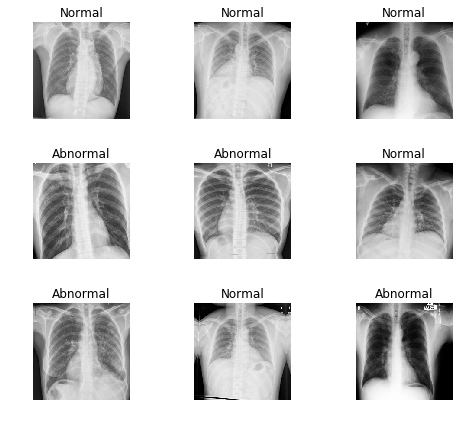

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [10]:
data.c,len(data.train_ds), len(data.valid_ds)

(2, 640, 160)

In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98879808.43it/s]


In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.954531,1.211882,0.518750,03:21
1,0.797474,1.329533,0.462500,03:12
2,0.755002,1.238082,0.462500,03:10
3,0.691026,1.024748,0.412500,03:10
4,0.653610,0.636744,0.275000,03:12


In [0]:
learn.save('stage-1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

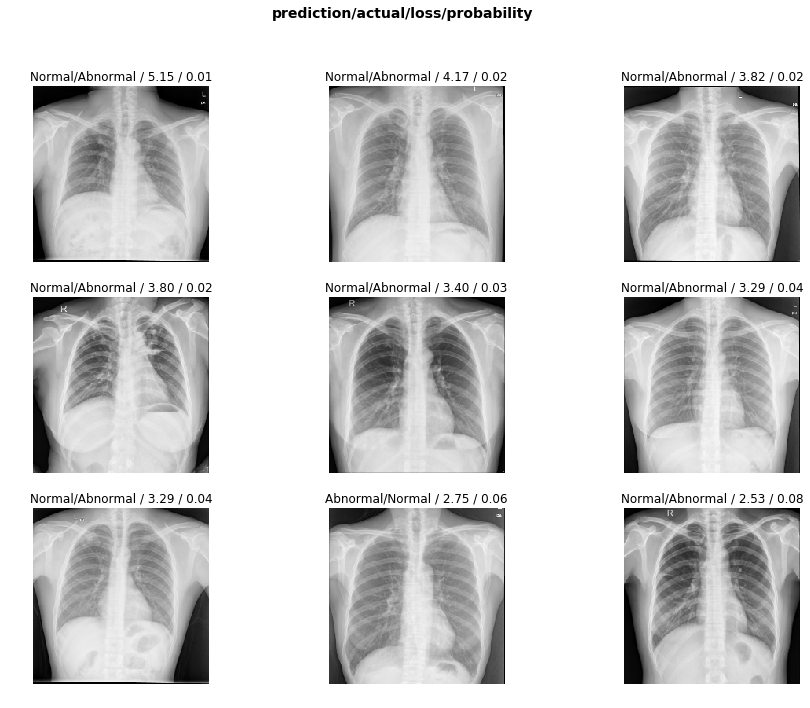

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

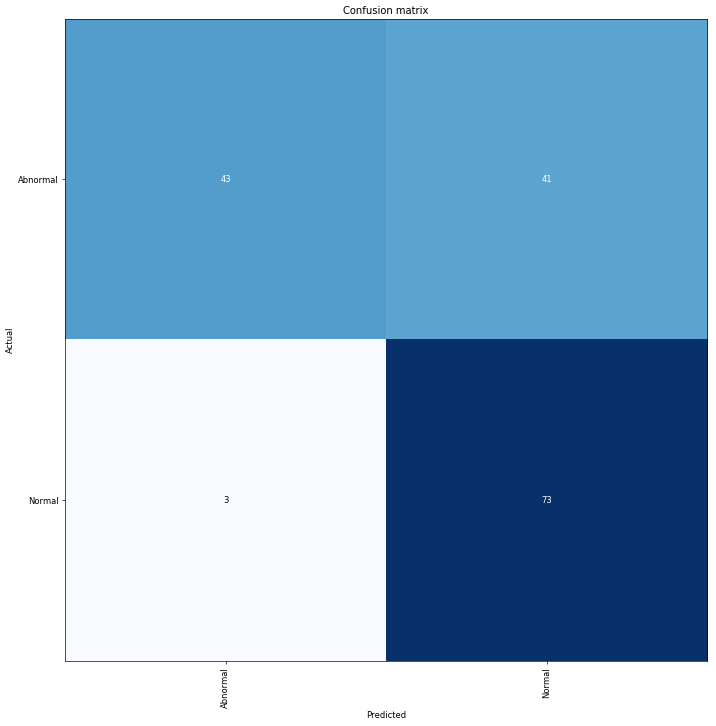

In [16]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


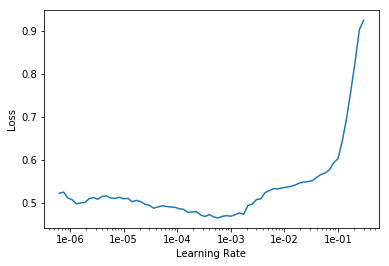

In [19]:
learn.recorder.plot()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.504321,0.548364,0.231250,03:11
1,0.483969,0.417130,0.187500,03:12
2,0.436288,0.449320,0.181250,03:10
3,0.404619,0.399623,0.118750,03:10
4,0.377284,0.371629,0.118750,03:09


In [22]:
learn.save('stage-2', return_path=True)

PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/models/stage-2.pth')

In [23]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.299483,0.379268,0.131250,03:12
1,0.297302,0.324209,0.106250,03:10
2,0.275310,0.369324,0.118750,03:11
3,0.254454,0.449305,0.118750,03:11
4,0.250639,0.361247,0.106250,03:11
5,0.243394,0.372740,0.125000,03:10
6,0.228309,0.337626,0.087500,03:12
7,0.214692,0.339766,0.081250,03:14
8,0.201583,0.346390,0.081250,03:10
9,0.196401,0.339541,0.081250,03:10


In [24]:
learn.save('final-stage-resnet34', return_path=True)

PosixPath('chinaset/ChinaSet_AllFiles/CXR_png/models/final-stage-resnet34.pth')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


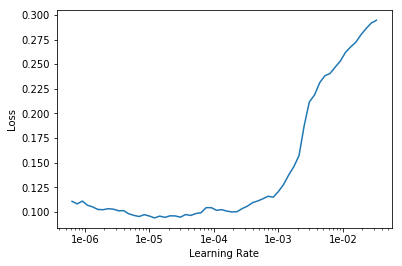

In [0]:
learn.recorder.plot()

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

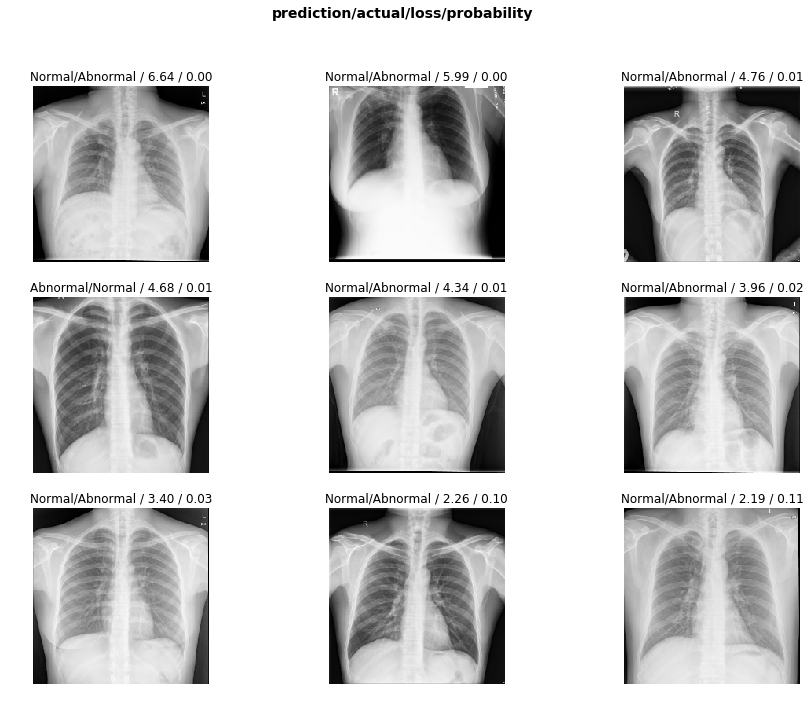

In [26]:
interp.plot_top_losses(9, figsize=(15,11))

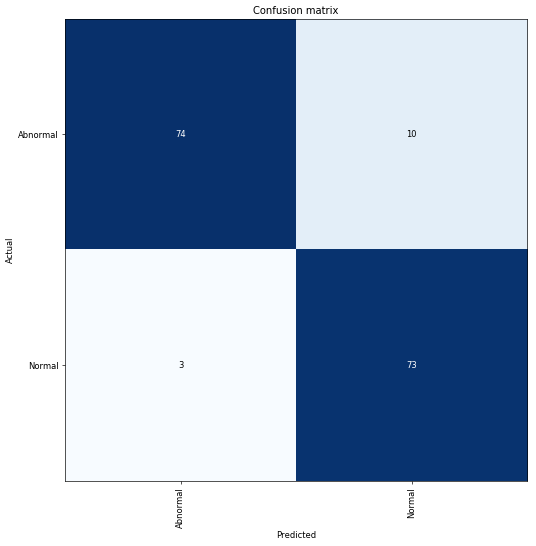

In [27]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

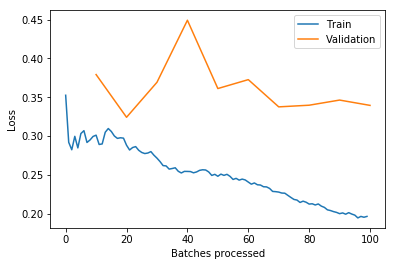

In [28]:
learn.recorder.plot_losses()

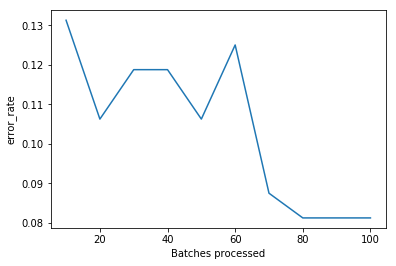

In [29]:
learn.recorder.plot_metrics()